### Quantum mechanics
 <font color = #0099cc>**Ph.D Lázaro Alonso Silva**  </font>
- lazarus.alon@gmail.com
- https://github.com/lazarusA

## Square potentials

###  <font color = red > Step potential </font>

The square potential is defined as $V(x) = V_{0}\Theta(x)$, where $\Theta$ is the Heavise function. 

In [1]:
using Gadfly
using LaTeXStrings

In [2]:
function heaviside(x)
   0.5 * (sign(x) + 1)
end

heaviside (generic function with 1 method)

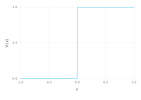

In [3]:
plot(heaviside, -1, 1, Guide.xlabel("x"),Guide.ylabel("V(x)"))

#### Case E > 0.
Scattering states

$$ k_1 = \sqrt{\frac{2mE}{\hbar^2}}, \quad  k_2 = \sqrt{\frac{2m(E - V_{0})}{\hbar^2}}$$

**Transmission coefficient and reflection coefficient.**

$$ T = \frac{k_2}{k_1} \left|\frac{A_2}{A_1}\right|^2,\quad R =  \left|\frac{B_1}{A_1}\right|^2$$
where \begin{equation}
\frac{A_2}{A_1}=\frac{2k_1}{k_1+k_2},\quad \frac{B_1}{A_1}=\frac{k_1-k_2}{k_1+k_2}.
\end{equation}

In [4]:
m = 9.1e-31 # kg

9.1e-31

In [5]:
hbar = 1.0545718e-34 # m^2 kg/s

1.0545718e-34

Default potential high $V0 = 0.2$

In [54]:
function step_transmission(Energy::Float64, V0::Float64 = 0.2, 
        m::Float64 = 9.1e-31, hbar::Float64 = 1.0545718e-34)
    if Energy < V0
        return 0.0
    else 
        k1 = sqrt(2*m*Energy/hbar^2)
        k2 = sqrt(2*m*(Energy - V0)/hbar^2)
        return k2*abs(2*k1/(k1 + k2))^2 / k1
    end
end

step_transmission (generic function with 4 methods)

In [64]:
energias = linspace(0, 1, 100);

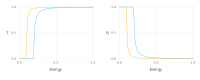

In [97]:
ptrans = plot(layer(x = energias, y = step_transmission.(energias, .1) , Geom.line,
        Theme(default_color="orange")),
     layer(x = energias, y = step_transmission.(energias, .2) , Geom.line),
    Guide.xlabel("Energy"), Guide.ylabel("T") )
prefl = plot(layer(x = energias, y = 1 - step_transmission.(energias, .1) , Geom.line,
        Theme(default_color="orange")),
     layer(x = energias, y = 1 - step_transmission.(energias, .2) , Geom.line),
    Guide.xlabel("Energy"), Guide.ylabel("R") )
draw(SVG(20cm, 8cm), hstack(ptrans, prefl))

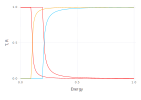

In [167]:
ptrans = plot(layer(x = energias, y = step_transmission.(energias, .1) , Geom.line,
        Theme(default_color="orange")),
     layer(x = energias, y = step_transmission.(energias, .2) , Geom.line),
    layer(x = energias, y = 1 - step_transmission.(energias, .1) , Geom.line,
        Theme(default_color="red")), 
    layer(x = energias, y = 1 - step_transmission.(energias, .2) , Geom.line, 
        Theme(default_color="red")),
    Guide.xlabel("Energy"), Guide.ylabel("T, R") )

When $E < 0$ the transmission probablity is zero, and the reflexion probability is 1. And an evanecence wave $e^{-\rho_{2} x}$. And his plot will be, 

In [155]:
function evan_wave(x::Float64, Energy::Float64 = .091, V0::Float64 = 0.2,
    m::Float64 = 1.0, hbar::Float64 = 1.0)
    rho_2 = sqrt(2*m*(V0-Energy)/hbar^2)
    sqrt(2*rho_2)*exp(-rho_2*x)
end

evan_wave (generic function with 6 methods)

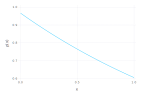

In [164]:
plot(evan_wave, 0.0, 1.0, Guide.xlabel("x"), Guide.ylabel("ρ(x)"))